In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [6]:
# Analyze continuous features
categorical = ["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
continuous_df = df.drop(categorical, axis=1)
continuous_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
continuous_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
continuous_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
continuous_df.groupby("Pclass")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [10]:
# Perform t-test to check the significance of continuous features
def group_by_feature(feature):
    print(feature)
    print(continuous_df.groupby("Survived")[feature].describe())
    t_test(feature)
    
def t_test(feature):
    not_survived = continuous_df[continuous_df["Survived"]==0][feature]
    survived = continuous_df[continuous_df["Survived"]==1][feature]
    tstat, p = stats.ttest_ind(not_survived, survived, equal_var=False)
    print(tstat, p)

In [11]:
for feature in ["Pclass", "Age", "SibSp", "Parch", "Fare"]:
    group_by_feature(feature)

Pclass
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
10.336953406118893 2.9111554993758293e-23
Age
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
nan nan
SibSp
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
1.194353436657065 0.23266263459528738
Parch
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0      

In [12]:
continuous_df.groupby(continuous_df["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


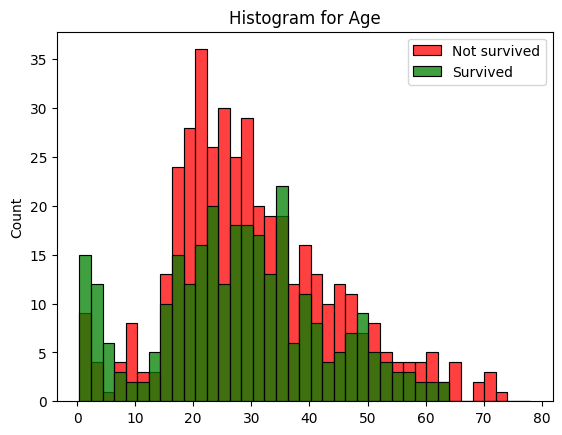

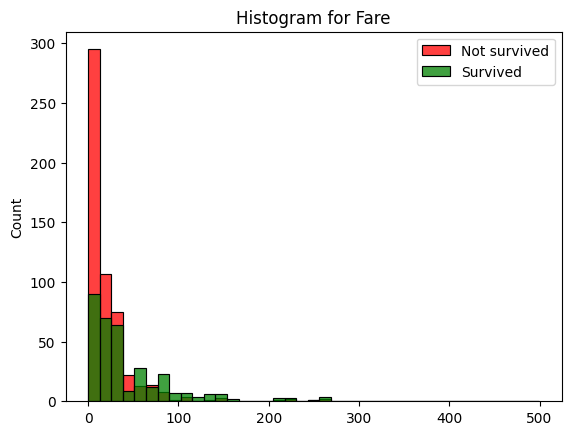

In [13]:
# Plot the distributions for Age and Fare
for i in ["Age", "Fare"]:
    not_survived = list(continuous_df[continuous_df["Survived"]==0][i].dropna())
    survived = list(continuous_df[continuous_df["Survived"]==1][i].dropna())
    xmin = min(min(not_survived), min(survived))
    xmax = max(max(not_survived), max(survived))
    width = (xmax-xmin)/40
    bins = np.arange(xmin, xmax, width)
    sns.histplot(not_survived, color='r', kde=False, bins=bins)
    sns.histplot(survived, color='g', kde=False, bins=bins)
    plt.legend(["Not survived", "Survived"])
    plt.title(f"Histogram for {i}")
    plt.show()

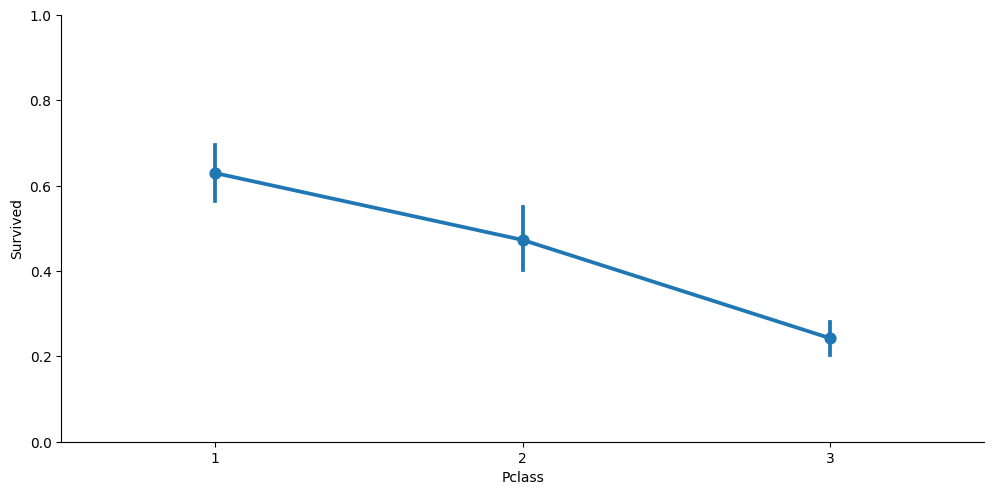

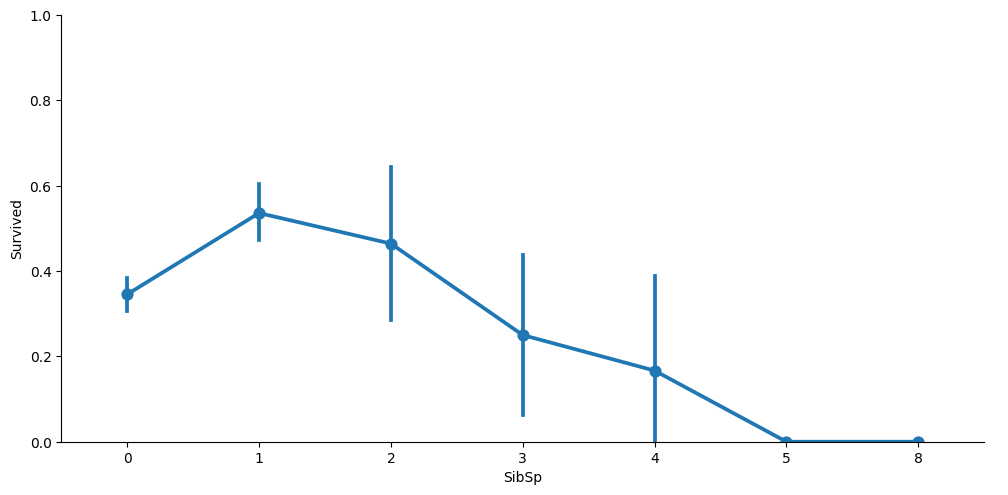

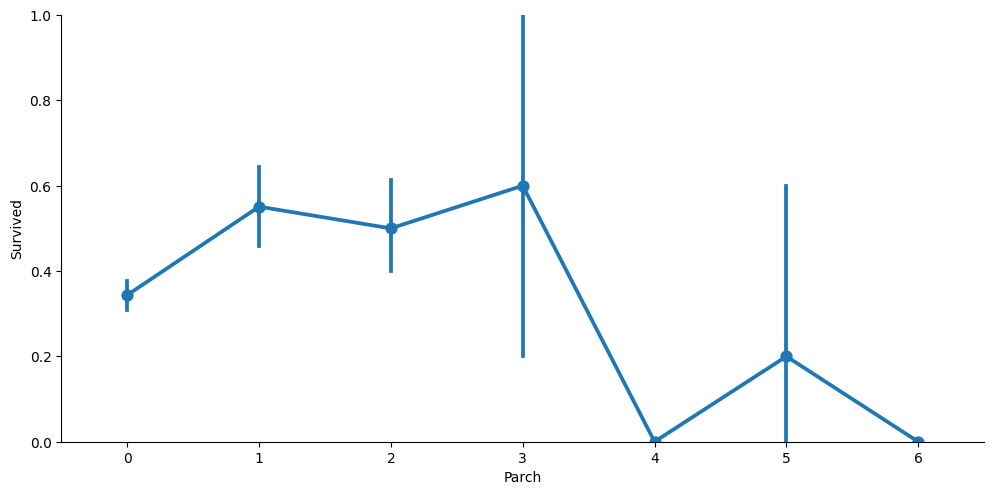

In [14]:
# Basic plots for other features
for i in ["Pclass", "SibSp", "Parch"]:
    sns.catplot(x=i, y="Survived", data=continuous_df, kind='point', aspect=2)
    plt.ylim(0,1)

(0.0, 1.0)

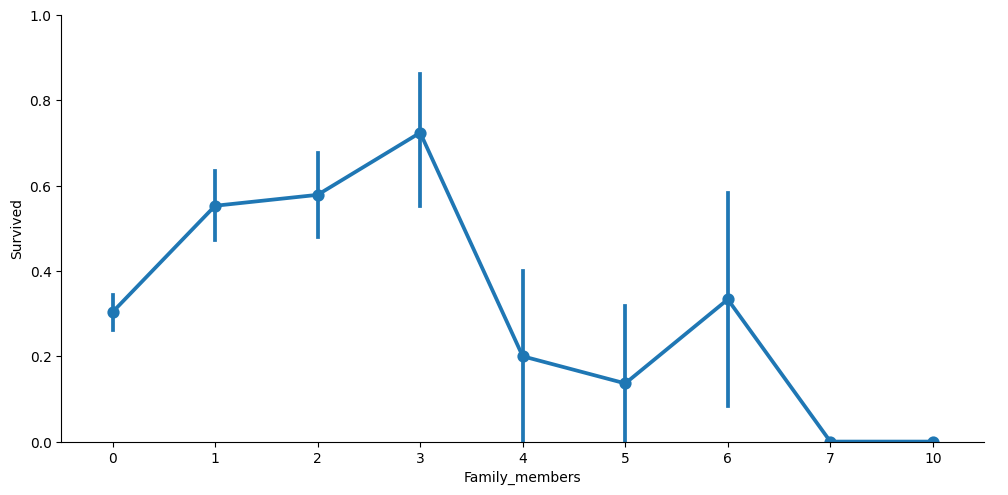

In [15]:
# Combine SibSp and Parch
continuous_df["Family_members"] = continuous_df["SibSp"] + continuous_df["Parch"]
sns.catplot(x="Family_members", y="Survived", data=continuous_df, kind='point', aspect=2)
plt.ylim(0,1)

In [16]:
# Analyze categorical features
continuous = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
categorical_df = df.drop(continuous, axis=1)
categorical_df.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [17]:
categorical_df.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [18]:
for col in categorical_df.columns:
    print(f"{col}: {categorical_df[col].nunique()}")

Survived: 2
Name: 891
Sex: 2
Ticket: 681
Cabin: 147
Embarked: 3


In [19]:
categorical_df.groupby(categorical_df["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [20]:
categorical_df.groupby(categorical_df["Cabin"].isnull())["Survived"].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [21]:
categorical_df.groupby((categorical_df["Embarked"]))["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [22]:
categorical_df["Ticket"].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [23]:
# Investigate if Name might indicate status 
categorical_df["Title"] = categorical_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
categorical_df.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [24]:
categorical_df.pivot_table("Survived", index=["Title", "Sex"], aggfunc=["count", "mean"])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [25]:
categorical_df["Title_specific"] = categorical_df["Title"].apply(lambda x: x if x in ["Master", "Miss", "Mr", "Mrs"] else "Other")
categorical_df["Cabin_indicator"] = np.where(categorical_df["Cabin"].isnull(), 0, 1)
categorical_df.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title,Title_specific,Cabin_indicator
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr,0


# DATA CLEANING

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna("O")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
# Detect outliers 
def outliers_check(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for x in data:
        z = (x-mean)/std
        if np.abs(z) > 3:
            outliers.append(x)
            
    print(f"Outliers for {feature}\n")
    print(f"95p: {data.quantile(0.95)}, Values above 95p: {len([i for i in data if i > data.quantile(0.95)])}")
    print(f"3std: {mean+3*std}, Values above 3std: {len(outliers)}")
    print(f"99p: {data.quantile(0.99)}, Values above 99p: {len([i for i in data if i > data.quantile(0.99)])}\n")

In [30]:
for feature in ["SibSp", "Parch", "Fare", "Age"]:
    outliers_check(feature)

Outliers for SibSp

95p: 3.0, Values above 95p: 30
3std: 3.829381161609053, Values above 3std: 30
99p: 5.0, Values above 99p: 7

Outliers for Parch

95p: 2.0, Values above 95p: 15
3std: 2.798407998662711, Values above 3std: 15
99p: 4.0, Values above 99p: 6

Outliers for Fare

95p: 112.07915, Values above 95p: 45
3std: 181.20081130289697, Values above 3std: 20
99p: 249.00622000000035, Values above 99p: 9

Outliers for Age

95p: 54.0, Values above 95p: 42
3std: 68.68326826542591, Values above 3std: 7
99p: 65.0, Values above 99p: 8



In [31]:
# Remove outliers
df["Age"] = df["Age"].clip(upper=df["Age"].quantile(0.99))
df["Fare"] = df["Fare"].clip(upper=df["Fare"].quantile(0.99))
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.640195,0.523008,0.381594,31.224767
std,257.353842,0.486592,0.836071,12.820616,1.102743,0.806057,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,65.000000,8.000000,6.000000,249.006220


# TRANSFORMING THE DATA

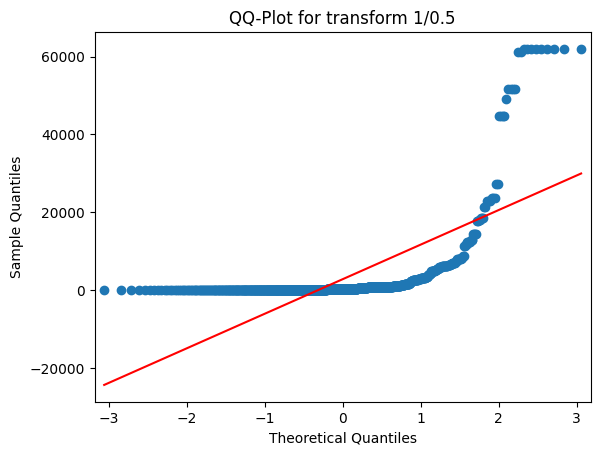

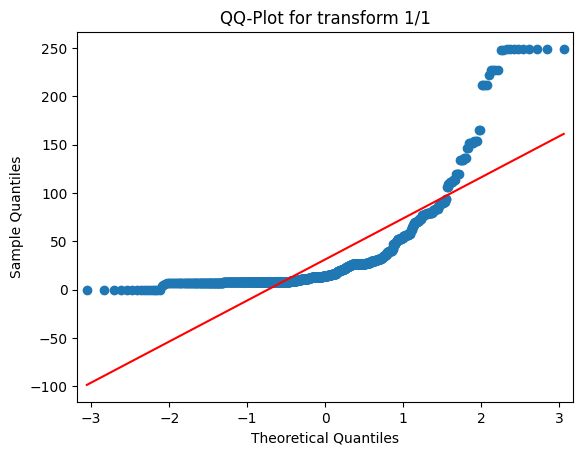

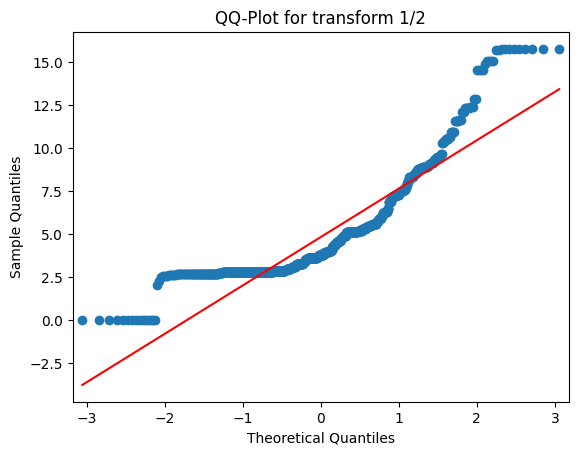

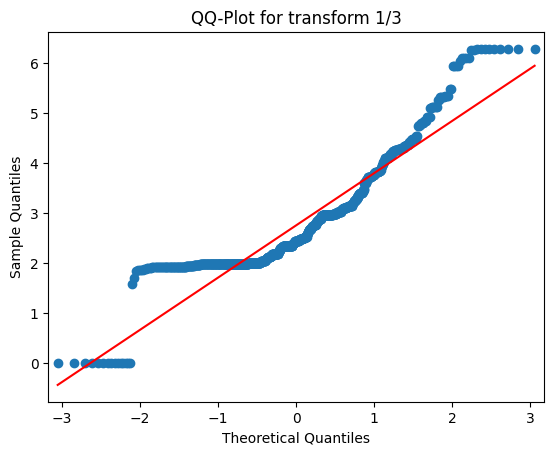

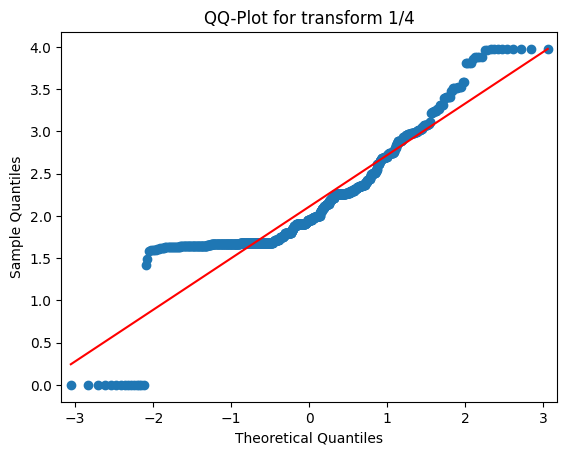

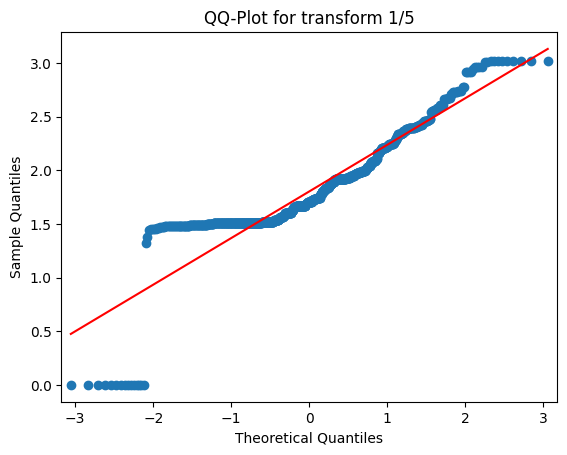

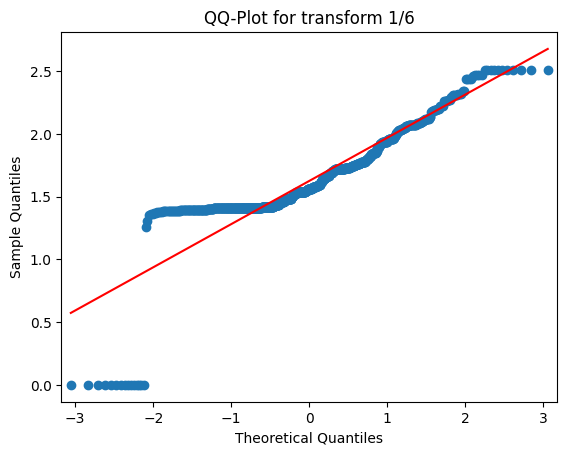

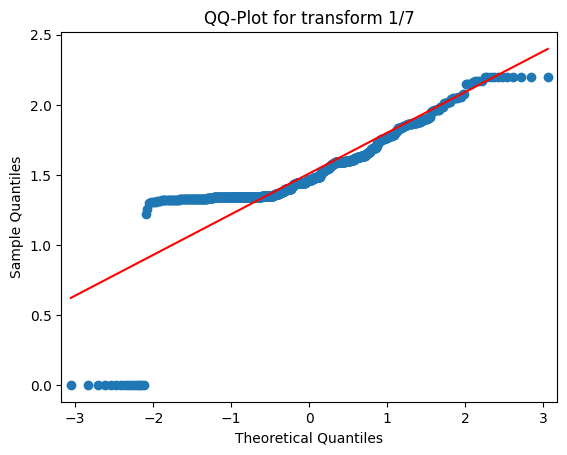

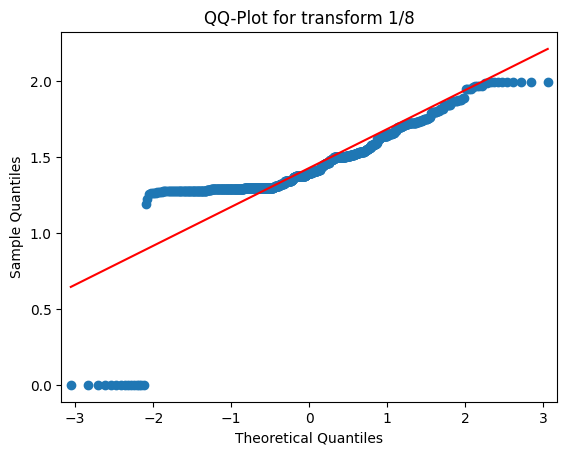

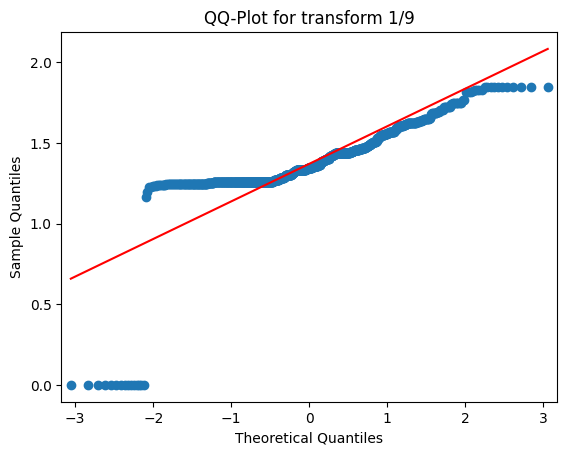

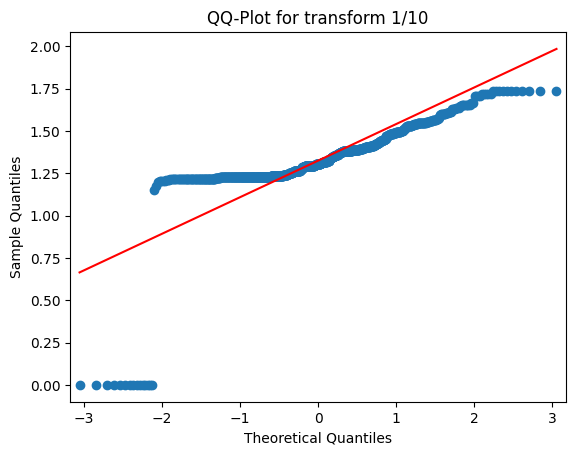

In [32]:
for i in [0.5,1,2,3,4,5,6,7,8,9,10]:
    data = df["Fare"]**(1/i)
    qqplot(data, line='s')
    plt.title(f"QQ-Plot for transform 1/{str(i)}")
    plt.show()

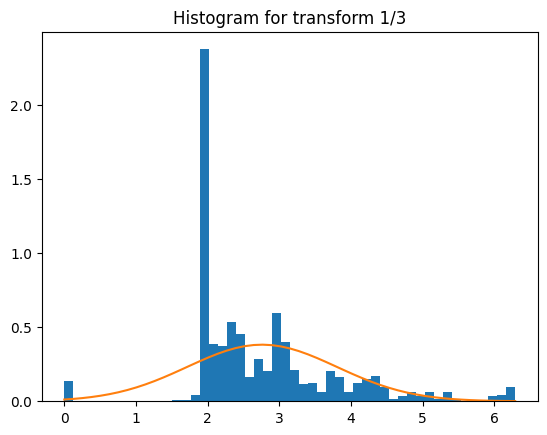

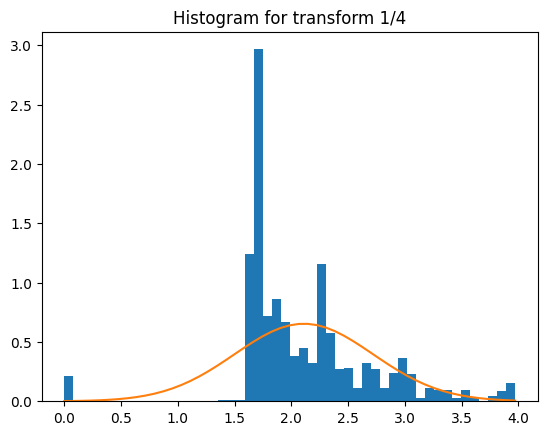

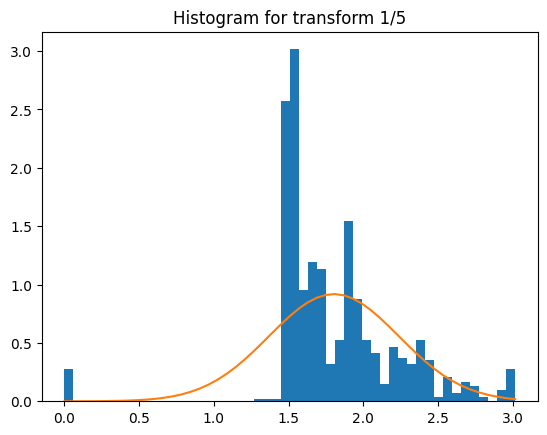

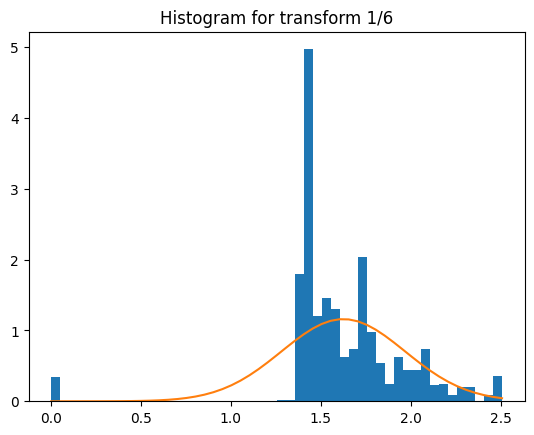

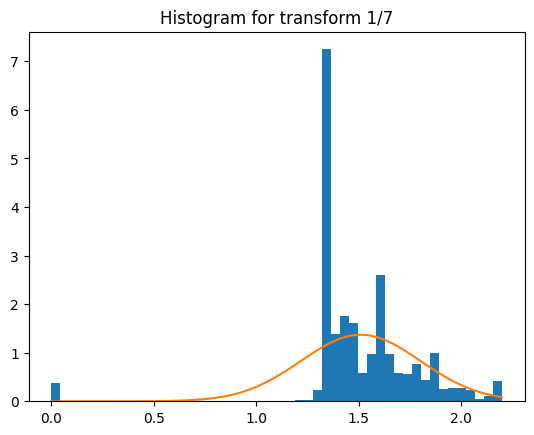

In [33]:
for i in [3,4,5,6,7]:
    data = df["Fare"]**(1/i)
    n, bins, patches = plt.hist(data, 50, density=True)
    mean = np.mean(data)
    std = np.std(data)
    plt.plot(bins, stats.norm.pdf(bins, mean, std))
    plt.title(f"Histogram for transform 1/{str(i)}")
    plt.show()

In [34]:
df["Fare_transformed"] = df["Fare"].apply(lambda x: x**(1/i))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.327105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.839554
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.344090
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.763770
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.347099


In [35]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df["Cabin_indicator"] = np.where(df["Cabin"].isnull(), 0, 1)
df["Family_members"] = df["SibSp"] + df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_transformed,Title,Cabin_indicator,Family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.327105,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.839554,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.344090,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.763770,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.347099,Mr,0,0


# CONVERT CATEGORICAL FEATURES TO NUMERICAL

In [36]:
for feature in ["Sex", "Cabin", "Embarked", "Title"]:
    encoder = LabelEncoder()
    df[feature] = encoder.fit_transform(df[feature].astype(str))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_transformed,Title,Cabin_indicator,Family_members
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,3,1.327105,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,1.839554,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,3,1.344090,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3,1.763770,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,3,1.347099,11,0,0


In [37]:
X = df.drop(["PassengerId", "Name", "Ticket", "Survived"], axis=1)
y = df["Survived"]

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_transformed,Title,Cabin_indicator,Family_members
0,3,1,22.0,1,0,7.2500,147,3,1.327105,11,0,1
1,1,0,38.0,1,0,71.2833,81,0,1.839554,12,1,1
2,3,0,26.0,0,0,7.9250,147,3,1.344090,8,0,0
3,1,0,35.0,1,0,53.1000,55,3,1.763770,12,1,1
4,3,1,35.0,0,0,8.0500,147,3,1.347099,11,0,0


# SPLIT DATA INTO 60% FOR TRAINING - 20% FOR VALIDATION - 20% FOR TESTING

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [39]:
for data in [y_train, y_val, y_test]:
    print(round(len(data)/len(y), 2))

0.6
0.2
0.2


In [40]:
# Create different datasets
original_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

selected_features = ['Pclass', 'Sex', 'Age', 'Family_members', 'Fare_transformed', 
                   'Cabin_indicator', 'Title']

<Axes: >

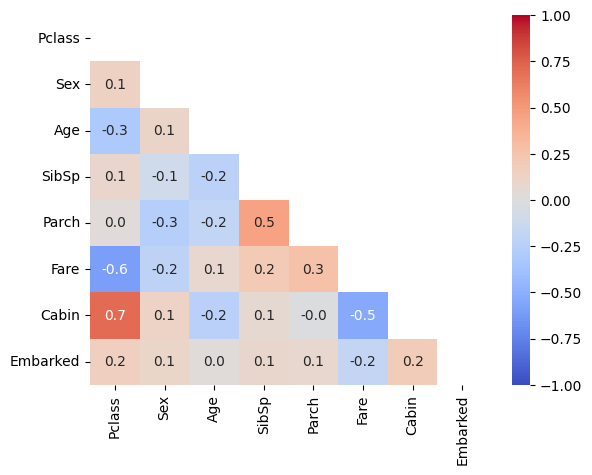

In [41]:
matrix_original = np.triu(X_train[original_features].corr())
sns.heatmap(X_train[original_features].corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix_original)

<Axes: >

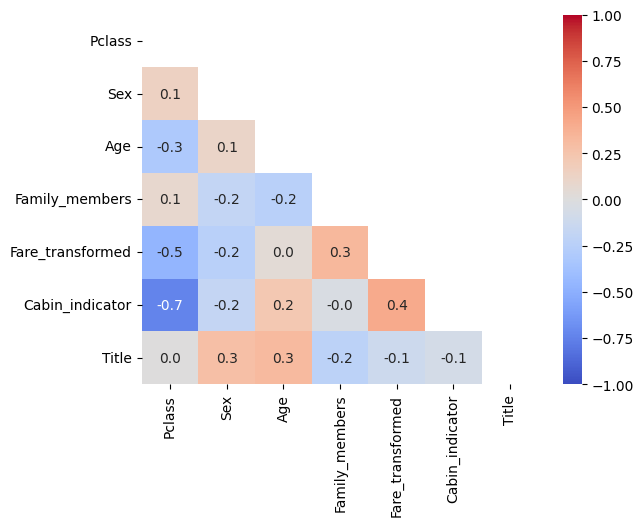

In [42]:
matrix_selected = np.triu(X_train[selected_features].corr())
sns.heatmap(X_train[selected_features].corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix_selected)

In [43]:
def output(results):
    print(f"BEST PARAMETERS: {results.best_params_}\n")
    
    means = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    parameters = results.cv_results_["params"]
    
    for mean, std, parameter in zip(means, stds, parameters):
        print(f"{round(mean,3)} (+/-) {round(2*std,3)} {parameter}")

# HYPERPARAMETER TUNING USING GRIDSEARCHCV

In [44]:
model = RandomForestClassifier()
parameters = {
    "n_estimators": [2**i for i in range(3,10)],
    "max_depth": [2, 4, 8, 16, 32, None]
}

In [45]:
cv_original = GridSearchCV(model, parameters, cv=5)
cv_original.fit(X_train[original_features], y_train.values.ravel())

output(cv_original)

BEST PARAMETERS: {'max_depth': 8, 'n_estimators': 512}

0.785 (+/-) 0.119 {'max_depth': 2, 'n_estimators': 8}
0.794 (+/-) 0.092 {'max_depth': 2, 'n_estimators': 16}
0.787 (+/-) 0.09 {'max_depth': 2, 'n_estimators': 32}
0.796 (+/-) 0.091 {'max_depth': 2, 'n_estimators': 64}
0.794 (+/-) 0.119 {'max_depth': 2, 'n_estimators': 128}
0.787 (+/-) 0.103 {'max_depth': 2, 'n_estimators': 256}
0.798 (+/-) 0.104 {'max_depth': 2, 'n_estimators': 512}
0.798 (+/-) 0.098 {'max_depth': 4, 'n_estimators': 8}
0.824 (+/-) 0.094 {'max_depth': 4, 'n_estimators': 16}
0.826 (+/-) 0.092 {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-) 0.11 {'max_depth': 4, 'n_estimators': 64}
0.811 (+/-) 0.11 {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-) 0.108 {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-) 0.107 {'max_depth': 4, 'n_estimators': 512}
0.822 (+/-) 0.081 {'max_depth': 8, 'n_estimators': 8}
0.822 (+/-) 0.071 {'max_depth': 8, 'n_estimators': 16}
0.835 (+/-) 0.05 {'max_depth': 8, 'n_estimators': 32}
0.837 (+/-)

In [46]:
cv_selected = GridSearchCV(model, parameters, cv=5)
cv_selected.fit(X_train[selected_features], y_train.values.ravel())

output(cv_selected)

BEST PARAMETERS: {'max_depth': 4, 'n_estimators': 8}

0.798 (+/-) 0.091 {'max_depth': 2, 'n_estimators': 8}
0.802 (+/-) 0.124 {'max_depth': 2, 'n_estimators': 16}
0.794 (+/-) 0.129 {'max_depth': 2, 'n_estimators': 32}
0.794 (+/-) 0.119 {'max_depth': 2, 'n_estimators': 64}
0.783 (+/-) 0.126 {'max_depth': 2, 'n_estimators': 128}
0.787 (+/-) 0.115 {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-) 0.118 {'max_depth': 2, 'n_estimators': 512}
0.828 (+/-) 0.093 {'max_depth': 4, 'n_estimators': 8}
0.822 (+/-) 0.103 {'max_depth': 4, 'n_estimators': 16}
0.817 (+/-) 0.109 {'max_depth': 4, 'n_estimators': 32}
0.815 (+/-) 0.094 {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-) 0.09 {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-) 0.102 {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-) 0.101 {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-) 0.098 {'max_depth': 8, 'n_estimators': 8}
0.822 (+/-) 0.059 {'max_depth': 8, 'n_estimators': 16}
0.817 (+/-) 0.086 {'max_depth': 8, 'n_estimators': 32}
0.82 (+/-) 

# CHECK FEATURE IMPORTANCES

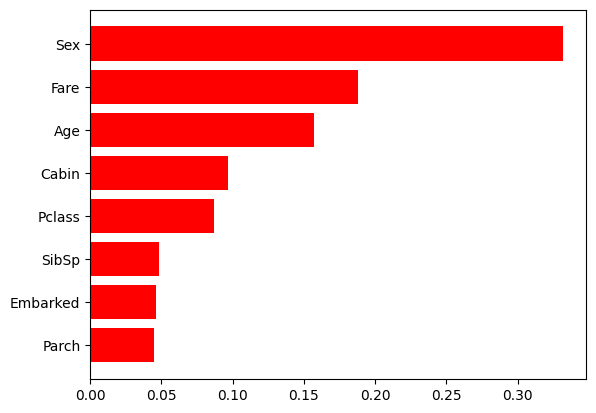

In [47]:
feat_imp_original = cv_original.best_estimator_.feature_importances_
indices_original = np.argsort(feat_imp_original)
plt.yticks(range(len(indices_original)), [X_train[original_features].columns[i] for i in indices_original])
plt.barh(range(len(indices_original)), feat_imp_original[indices_original], color='r', align='center')
plt.show()

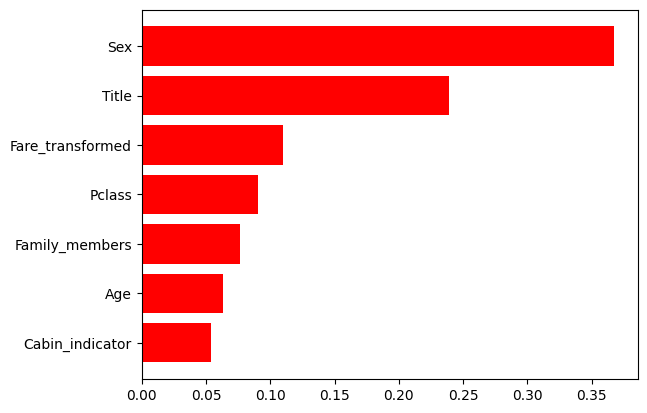

In [48]:
feat_imp_selected = cv_selected.best_estimator_.feature_importances_
indices_selected = np.argsort(feat_imp_selected)
plt.yticks(range(len(indices_selected)), [X_train[selected_features].columns[i] for i in indices_selected])
plt.barh(range(len(indices_selected)), feat_imp_selected[indices_selected], color='r', align='center')
plt.show()

# MODEL EVALUATION

In [49]:
def model_evaluation(name, model, X, y):
    start = time()
    y_pred = model.predict(X)
    end = time()
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print(f"{name} -- Accuracy: {round(accuracy,3)}, Precision: {round(precision,3)}, Recall: {round(recall,3)}, Latency: {(end-start)*1000} ms")

In [50]:
# Validation data
model_evaluation("Original_features", cv_original.best_estimator_, X_val[original_features], y_val)
model_evaluation("Selected_features", cv_selected.best_estimator_, X_val[selected_features], y_val)

Original_features -- Accuracy: 0.809, Precision: 0.782, Recall: 0.662, Latency: 83.90021324157715 ms
Selected_features -- Accuracy: 0.792, Precision: 0.733, Recall: 0.677, Latency: 0.0 ms


In [52]:
# Test data
model_evaluation("Test_features", cv_original.best_estimator_, X_test[original_features], y_test)

Test_features -- Accuracy: 0.804, Precision: 0.836, Recall: 0.671, Latency: 64.44954872131348 ms
